# Quick test of Excel in Python

We will use the Excel simulator to estimate the inflation sequence of different supply shocks.

Quick links:
* [Final result](#final-result)
* [Interactive Playground](#playground)
* [Code](#code)

The parameters used in the Spreadsheet are the following:
![](2022-07-05-09-38-38.png)

## Final result
This plot was generated in Python with sequential calculations from the `Excel Simulator`.

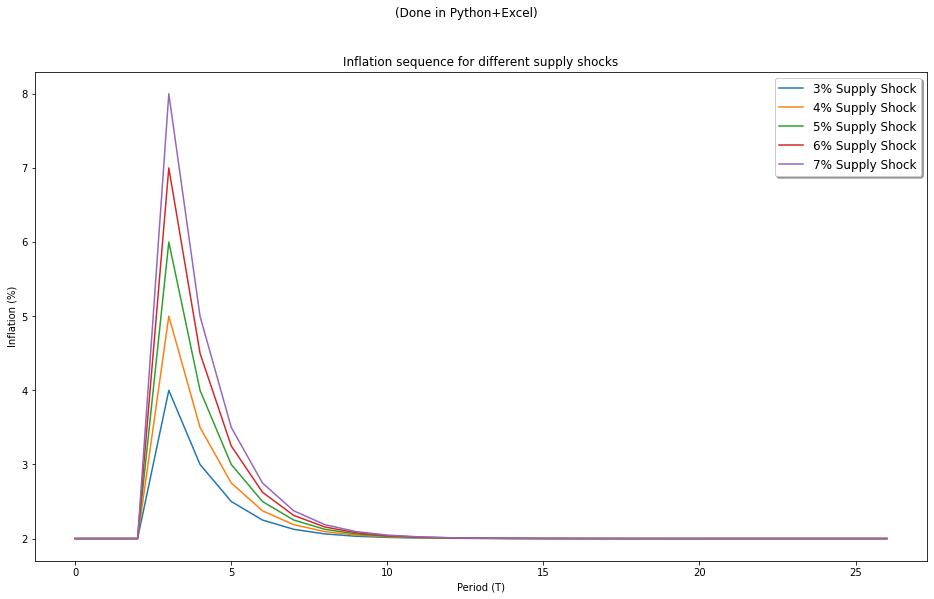

In [9]:
try:
    display(fig)
except:
    pass


# Code
We need to run all the code before generating the output from above! Remember the code will not appear in the interactive module, only in the Jupyter Notebook.

In [2]:
%matplotlib inline
from pycel import ExcelCompiler
import pycel
import matplotlib.pyplot as plt

filename = r'carlin_soskice_macroeconomic_simulator (unprotected) (2).xlsx'

In [3]:
# load & compile the file to a graph
excel = ExcelCompiler(filename=filename,cycles=True)

eval_ctx = pycel.excelformula.ExcelFormula.build_eval_context(
                excel._evaluate, excel._evaluate_range,
                excel.log, plugins=excel._plugin_modules)

def eval_formula(formula): 
    return eval_ctx(pycel.excelformula.ExcelFormula(formula), cse_array_address=None) 

Initialized with cycles: True, while workbook says: False


In [4]:
# Before serializing the graph, we need to build the cell dependency graph by evaluating the relevant cells once.

# Read excel's current inflation sequence and for a given supply shock
supply_shock = excel.evaluate('main page!G11')
inflation_sequence = excel.evaluate('normal case!L3:L30')

# Now we can save the graph to a pickle file
print("Serializing to disk...")
excel.to_file(filename + '.pkl')

Serializing to disk...


In [5]:
# We can also print the output of the inflation sequence
print('Supply shock: ' + str(supply_shock)+'%')
print(inflation_sequence)

Supply shock: None%
(2, 2, 2, 2, 1, 1.5, 1.75, 1.875, 1.9375, 1.96875, 1.984375, 1.9921875, 1.99609375, 1.998046875, 1.9990234375, 1.99951171875, 1.999755859375, 1.9998779296875, 1.99993896484375, 1.999969482421875, 1.9999847412109375, 1.9999923706054688, 1.9999961853027344, 1.9999980926513672, 1.9999990463256836, 1.9999995231628418, 1.999999761581421, 1.9999998807907104)


In [6]:
# Load the compiled file to confirm it was serialized correctly
print("Loading from compiled file...")
excel = ExcelCompiler.from_file(filename + '.pkl')

Loading from compiled file...


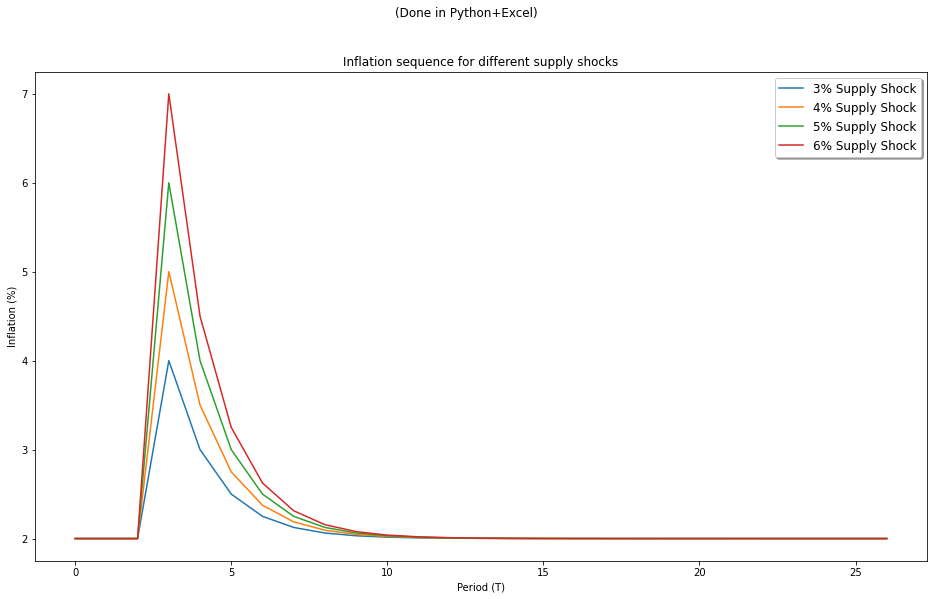

In [7]:
# We want to change the value of the cell specifying the shock parameters and re-evaluate the inflation sequence.
# Pycel has a problem with the cache mechanism of cell ranges, to avoid this we reload the compiled excel.
# As we use a serialized pickle file, this is not necessary slow.   

fig, ax = plt.subplots()

# Set the figure size to 16,9
fig.set_size_inches(16,9)

output_data = {}
for supply_shock in range(3,7):       
    excel = ExcelCompiler.from_file(filename + '.pkl')
    excel.set_value('main page!G11', supply_shock)
    supply_shock = excel.evaluate('main page!G11')
    inflation_sequence = excel.evaluate('normal case!L4:L31')
    output_data[supply_shock] = inflation_sequence

    ax.plot(inflation_sequence, label=''+str(supply_shock)+'% Supply Shock')

# Prepare final plot outcome
ax.set_xlabel('Period (T)')
ax.set_ylabel('Inflation (%)')
ax.set_title('Inflation sequence for different supply shocks')
fig.suptitle("(Done in Python+Excel)")
legend = ax.legend(loc='upper right', shadow=True, fontsize='large')
plt.show()


# Playground
Interactive widget to add shocks. This can only be located after the code but remember 

In [8]:
# Playground 
import ipywidgets as widgets
def add_shock(supply_shock=10):
    excel = ExcelCompiler.from_file(filename + '.pkl')
    excel.set_value('main page!G11', supply_shock)
    supply_shock = excel.evaluate('main page!G11')
    inflation_sequence = excel.evaluate('normal case!L4:L31')
    ax.plot(inflation_sequence, label=''+str(supply_shock)+'% Supply Shock')
    ax.legend(loc='upper right', shadow=True, fontsize='large')
    display(fig)

widgets.interactive(add_shock, supply_shock=widgets.IntSlider(min=0, max=40, step=1, value=7), continuous_update=False)

interactive(children=(IntSlider(value=7, description='supply_shock', max=40), Output()), _dom_classes=('widget…